In [ ]:
# =============================================================================
# GOOGLE COLAB SETUP / GOOGLE COLAB SETUP
# =============================================================================

# Sjekk om vi kjører i Google Colab
try:
    import google.colab
    IN_COLAB = True
    print("🔧 Kjører i Google Colab - installerer avhengigheter...")
    print("🔧 Running in Google Colab - installing dependencies...")
    
    # Installer nødvendige pakker
    import subprocess
    import sys
    try:
        subprocess.check_call([sys.executable, "-m", "pip", "install", "-q", 
                              "networkx", "matplotlib", "plotly", "pydantic", 
                              "pyyaml", "pandas", "ipywidgets", "pillow", "kaleido"])
        print("✅ Pakker installert")
    except Exception as e:
        print(f"⚠️ Pip install feilet: {e}")
    
    # Fjern eksisterende slektstre-mappe hvis den finnes
    import shutil
    import os
    if os.path.exists('/content/slektstre'):
        shutil.rmtree('/content/slektstre')
        print("🗑️ Fjernet eksisterende slektstre-mappe")
    
    # Klon repository
    try:
        subprocess.check_call(['git', 'clone', 'https://github.com/arvidl/slektstre.git'])
        print("✅ Repository klonet")
    except Exception as e:
        print(f"⚠️ Git clone feilet: {e}")
    
    # Legg til src-mappen til Python path og importer direkte
    sys.path.insert(0, '/content/slektstre/src')
    print("✅ Path lagt til")
    
    # Importer slektstre-modulene direkte for å unngå navnekonflikt
    import importlib.util
    import types
    
    # Først, fjern konfliktende moduler fra sys.modules
    modules_to_remove = ['tree', 'models', 'localization']
    for module_name in modules_to_remove:
        if module_name in sys.modules:
            del sys.modules[module_name]
    
    # Last inn models.py først
    try:
        spec = importlib.util.spec_from_file_location("slektstre_models", "/content/slektstre/src/models.py")
        slektstre_models = importlib.util.module_from_spec(spec)
        spec.loader.exec_module(slektstre_models)
        
        # Opprett midlertidig models modul
        temp_models_module = types.ModuleType('models')
        temp_models_module.Person = slektstre_models.Person
        temp_models_module.Gender = slektstre_models.Gender
        temp_models_module.Ekteskap = slektstre_models.Ekteskap
        temp_models_module.FamilieData = slektstre_models.FamilieData
        sys.modules['models'] = temp_models_module
        
        print("✅ models.py lastet")
    except Exception as e:
        print(f"⚠️ models.py feilet: {e}")
    
    # Last inn localization.py
    try:
        spec = importlib.util.spec_from_file_location("slektstre_localization", "/content/slektstre/src/localization.py")
        slektstre_localization = importlib.util.module_from_spec(spec)
        spec.loader.exec_module(slektstre_localization)
        
        # Opprett midlertidig localization modul
        temp_localization_module = types.ModuleType('localization')
        temp_localization_module.t = slektstre_localization.t
        sys.modules['localization'] = temp_localization_module
        
        print("✅ localization.py lastet")
    except Exception as e:
        print(f"⚠️ localization.py feilet: {e}")
    
    # Last inn tree.py som slektstre_tree
    try:
        spec = importlib.util.spec_from_file_location("slektstre_tree", "/content/slektstre/src/tree.py")
        slektstre_tree = importlib.util.module_from_spec(spec)
        spec.loader.exec_module(slektstre_tree)
        
        # Opprett midlertidig tree modul
        temp_tree_module = types.ModuleType('tree')
        temp_tree_module.Slektstre = slektstre_tree.Slektstre
        sys.modules['tree'] = temp_tree_module
        
        print("✅ tree.py lastet")
    except Exception as e:
        print(f"⚠️ tree.py feilet: {e}")
    
    # Last inn family_io.py
    try:
        spec = importlib.util.spec_from_file_location("slektstre_io", "/content/slektstre/src/family_io.py")
        slektstre_io = importlib.util.module_from_spec(spec)
        spec.loader.exec_module(slektstre_io)
        print("✅ family_io.py lastet")
    except Exception as e:
        print(f"⚠️ family_io.py feilet: {e}")
    
    # Last inn visualization.py
    try:
        spec = importlib.util.spec_from_file_location("slektstre_viz", "/content/slektstre/src/visualization.py")
        slektstre_viz = importlib.util.module_from_spec(spec)
        spec.loader.exec_module(slektstre_viz)
        print("✅ visualization.py lastet")
    except Exception as e:
        print(f"⚠️ visualization.py feilet: {e}")
    
    # Opprett eksporterte_bilder-mappe for Colab
    try:
        os.makedirs('/content/eksporterte_bilder', exist_ok=True)
        print("✅ Eksporterte_bilder-mappe opprettet")
    except Exception as e:
        print(f"⚠️ Kunne ikke opprette eksporterte_bilder-mappe: {e}")
    
    print("✅ Slektstre-moduler lastet inn i Colab")
    
except ImportError:
    IN_COLAB = False
    print("💻 Kjører lokalt / Running locally")
    import sys
    sys.path.append('../src')
except Exception as e:
    print(f"⚠️ Colab setup feilet: {e}")
    IN_COLAB = False
    print("💻 Fallback til lokal modus / Fallback to local mode")
    import sys
    sys.path.append('../src')

print(f"📍 Miljø: {'Google Colab' if IN_COLAB else 'Lokal'}")
print(f"📍 Environment: {'Google Colab' if IN_COLAB else 'Local'}")


# Visualisering av slektstre

I denne notebooken utforsker vi alle tilgjengelige visualiseringsalternativer for slektstre.

## Tilgjengelige visualiseringer

1. **Hierarkisk tre** - Tradisjonell struktur
2. **Fan chart** - Sirkulær visning
3. **Interaktiv tre** - Plotly-basert
4. **Hourglass view** - Fokusperson i midten
5. **Statistikk** - Grafer og diagrammer


In [ ]:
# Importer nødvendige biblioteker
import matplotlib.pyplot as plt
import plotly.express as px
from datetime import date

# Importer slektstre-moduler (fungerer både lokalt og i Colab)
if IN_COLAB:
    # Bruk de modulene vi lastet inn i Colab-setup
    Person = slektstre_models.Person
    Gender = slektstre_models.Gender
    Ekteskap = slektstre_models.Ekteskap
    FamilieData = slektstre_models.FamilieData
    Slektstre = slektstre_tree.Slektstre
    load_from_yaml = slektstre_io.load_from_yaml
    plot_hierarchical_tree = slektstre_viz.plot_hierarchical_tree
    plot_fan_chart = slektstre_viz.plot_fan_chart
    plot_interactive_tree = slektstre_viz.plot_interactive_tree
    plot_statistics = slektstre_viz.plot_statistics
    plot_hourglass_view = slektstre_viz.plot_hourglass_view
else:
    # Lokale imports
    import sys
    sys.path.append('../src')
    from models import Person, Ekteskap, FamilieData, Gender
    from tree import Slektstre
    from family_io import load_from_yaml
    from visualization import (
        plot_hierarchical_tree,
        plot_fan_chart,
        plot_interactive_tree,
        plot_statistics,
        plot_hourglass_view
    )

print("✅ Alle biblioteker importert!")


✅ Alle biblioteker importert!


In [ ]:
# Last eksempel-familie
if IN_COLAB:
    familie_data = load_from_yaml('/content/slektstre/data/eksempel_familie.yaml')
else:
    familie_data = load_from_yaml('../data/eksempel_familie.yaml')

slektstre = Slektstre(familie_data)

print(f"Familie lastet med {len(familie_data.personer)} personer")
print(f"Beskrivelse: {familie_data.beskrivelse}")

# Vis statistikk
stats = slektstre.get_statistics()
print(f"\n📊 Statistikk:")
print(f"Antall generasjoner: {stats['max_generation'] + 1}")
print(f"Gjennomsnittsalder: {stats['average_age']:.1f} år")
print(f"Antall ekteskap: {stats['total_marriages']}")


Familie lastet med 17 personer
Beskrivelse: Eksempel familie med 4 generasjoner - Lundervold familien

📊 Statistikk:
Antall generasjoner: 3
Gjennomsnittsalder: 49.2 år
Antall ekteskap: 5


## 1. Hierarkisk tre

Tradisjonell struktur med generasjoner fra topp til bunn:


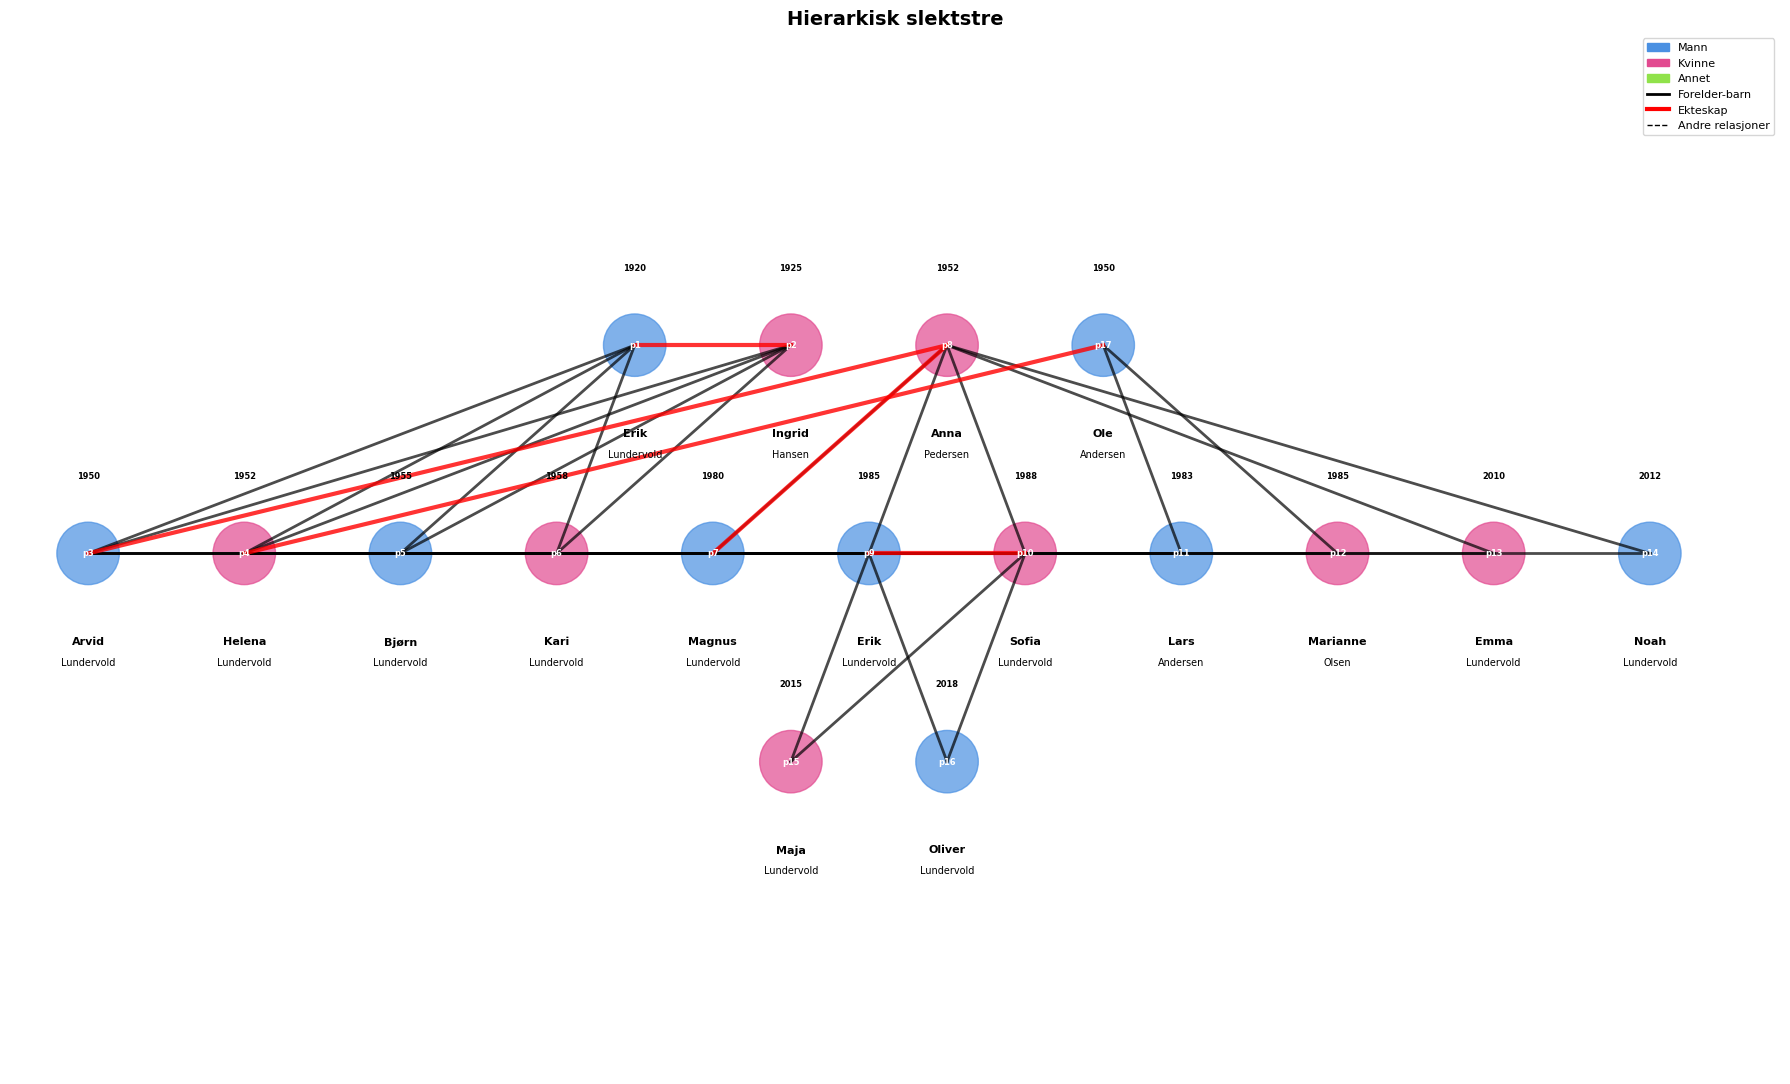

In [3]:
# Plott hierarkisk tre
fig = plot_hierarchical_tree(slektstre, title="Hierarkisk slektstre")
plt.show()


## 2. Fan Chart

Sirkulær visning med eldste generasjon i midten:


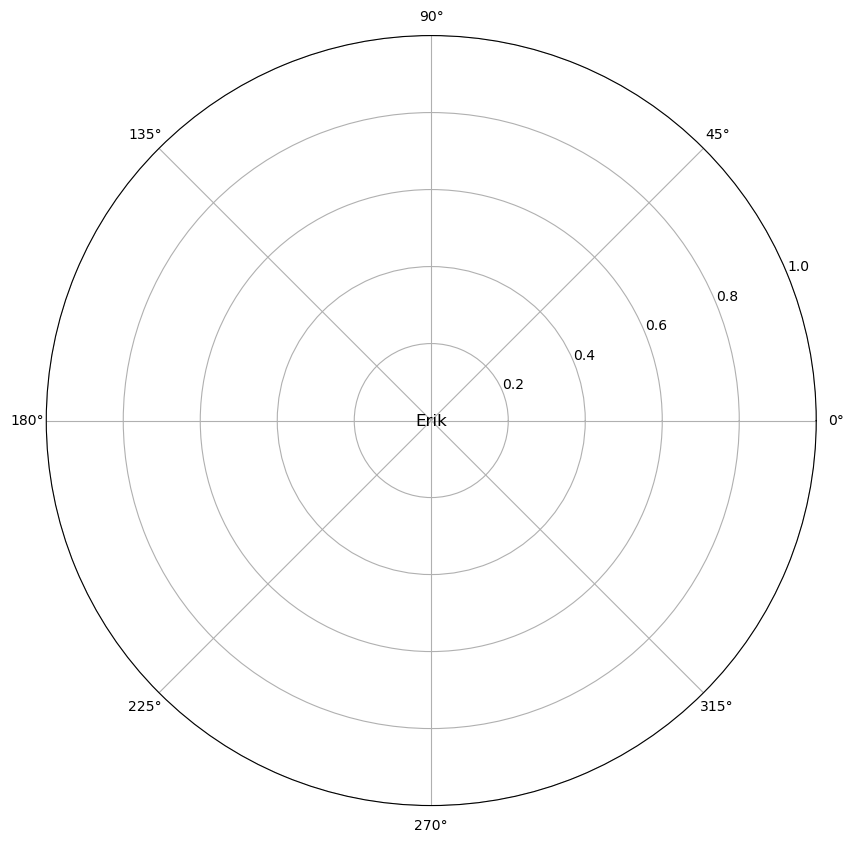

In [4]:
# Plott fan chart
# Vi trenger en root_person_id for fan chart - bruk første person
alle_personer = slektstre.get_all_persons()
if alle_personer:
    root_person_id = alle_personer[0].id
    fig = plot_fan_chart(slektstre, root_person_id, title="Fan Chart - Sirkulær visning")
    plt.show()
else:
    print("Ingen personer funnet i slektstreet!")


## 3. Interaktiv tre

Plotly-basert interaktiv visualisering med hover-info:


In [5]:
# Plott interaktiv tre
fig = plot_interactive_tree(slektstre, title="Interaktiv slektstre")
fig.show()


## 4. Hourglass View

Fokusperson i midten med forfedre over og etterkommere under:


Fokusperson: Arvid Lundervold (ID: p3)


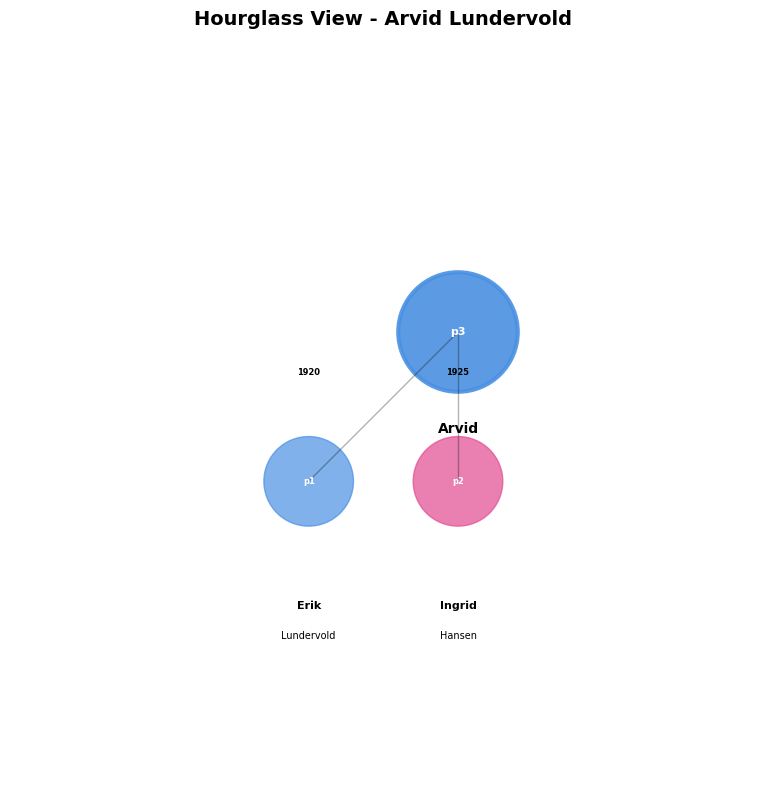

In [6]:
# Velg en fokusperson (Arvid Lundervold)
fokusperson_id = "p3"  # Arvid Lundervold
fokusperson = slektstre.get_person(fokusperson_id)

if fokusperson:
    print(f"Fokusperson: {fokusperson.fullt_navn} (ID: {fokusperson.id})")
    
    # Plott hourglass view
    fig = plot_hourglass_view(slektstre, fokusperson_id, title=f"Hourglass View - {fokusperson.fullt_navn}")
    plt.show()
else:
    print("Fokusperson ikke funnet!")


## 5. Statistikk og diagrammer

Vis ulike statistikk-diagrammer:


In [7]:
# Plott statistikk
fig = plot_statistics(slektstre)
fig.show()


## 6. Tilpassede visualiseringer

La oss eksperimentere med forskjellige parametere:


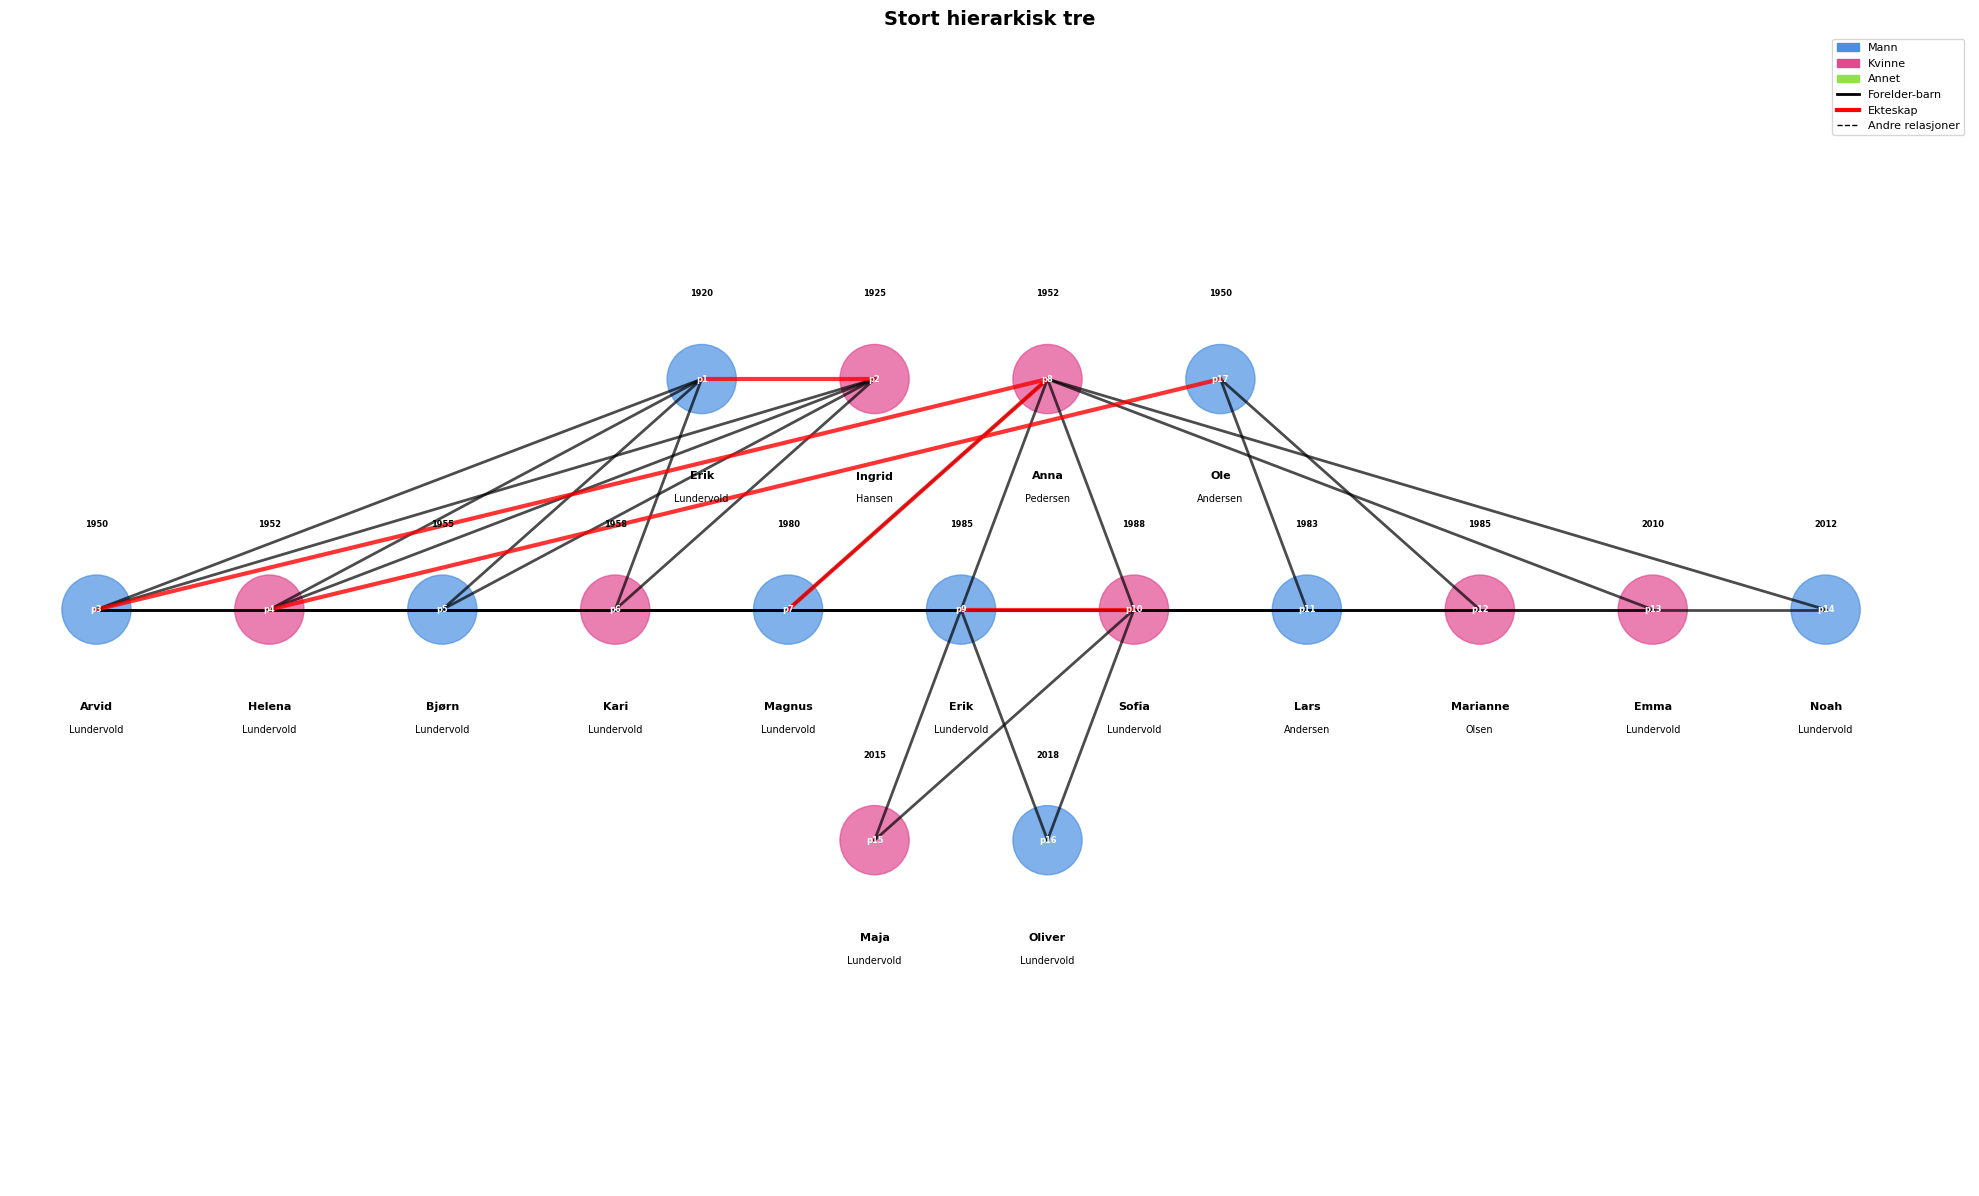

In [8]:
# Hierarkisk tre med større figurstørrelse
fig = plot_hierarchical_tree(
    slektstre, 
    title="Stort hierarkisk tre",
    figsize=(20, 12)
)
plt.show()


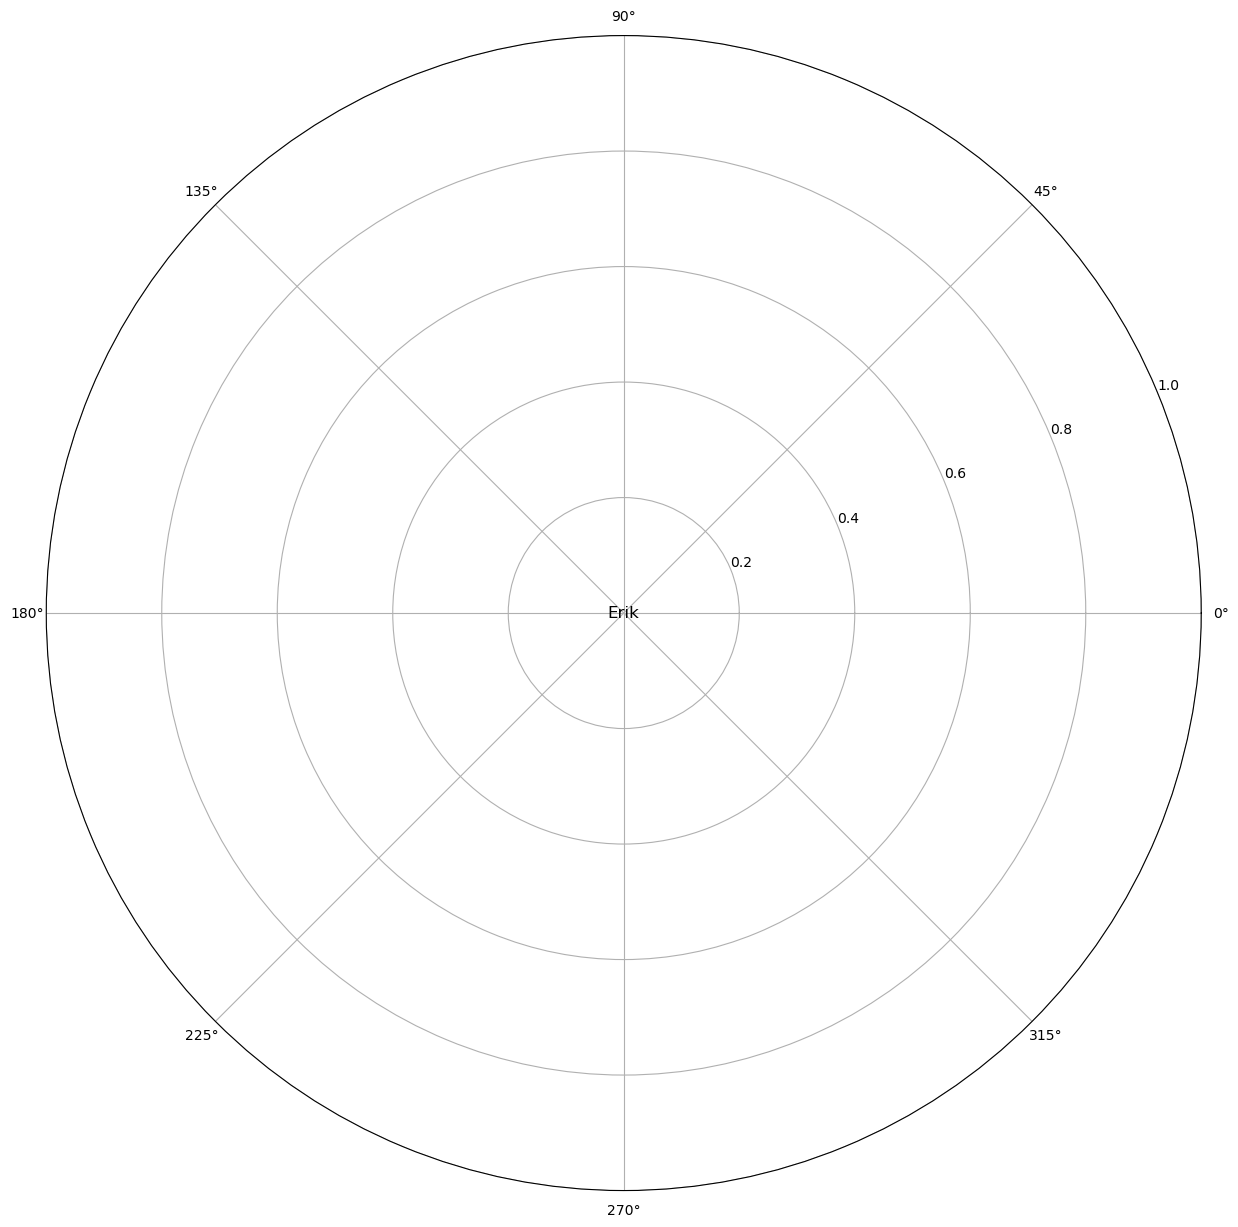

In [9]:
# Fan chart med større figsize
alle_personer = slektstre.get_all_persons()
if alle_personer:
    root_person_id = alle_personer[0].id
    fig = plot_fan_chart(
        slektstre, 
        root_person_id,
        title="Stor fan chart",
        figsize=(15, 15)
    )
    plt.show()
else:
    print("Ingen personer funnet i slektstreet!")


## 7. Sammenligning av visualiseringer

La oss sammenligne forskjellige visualiseringer side ved side:


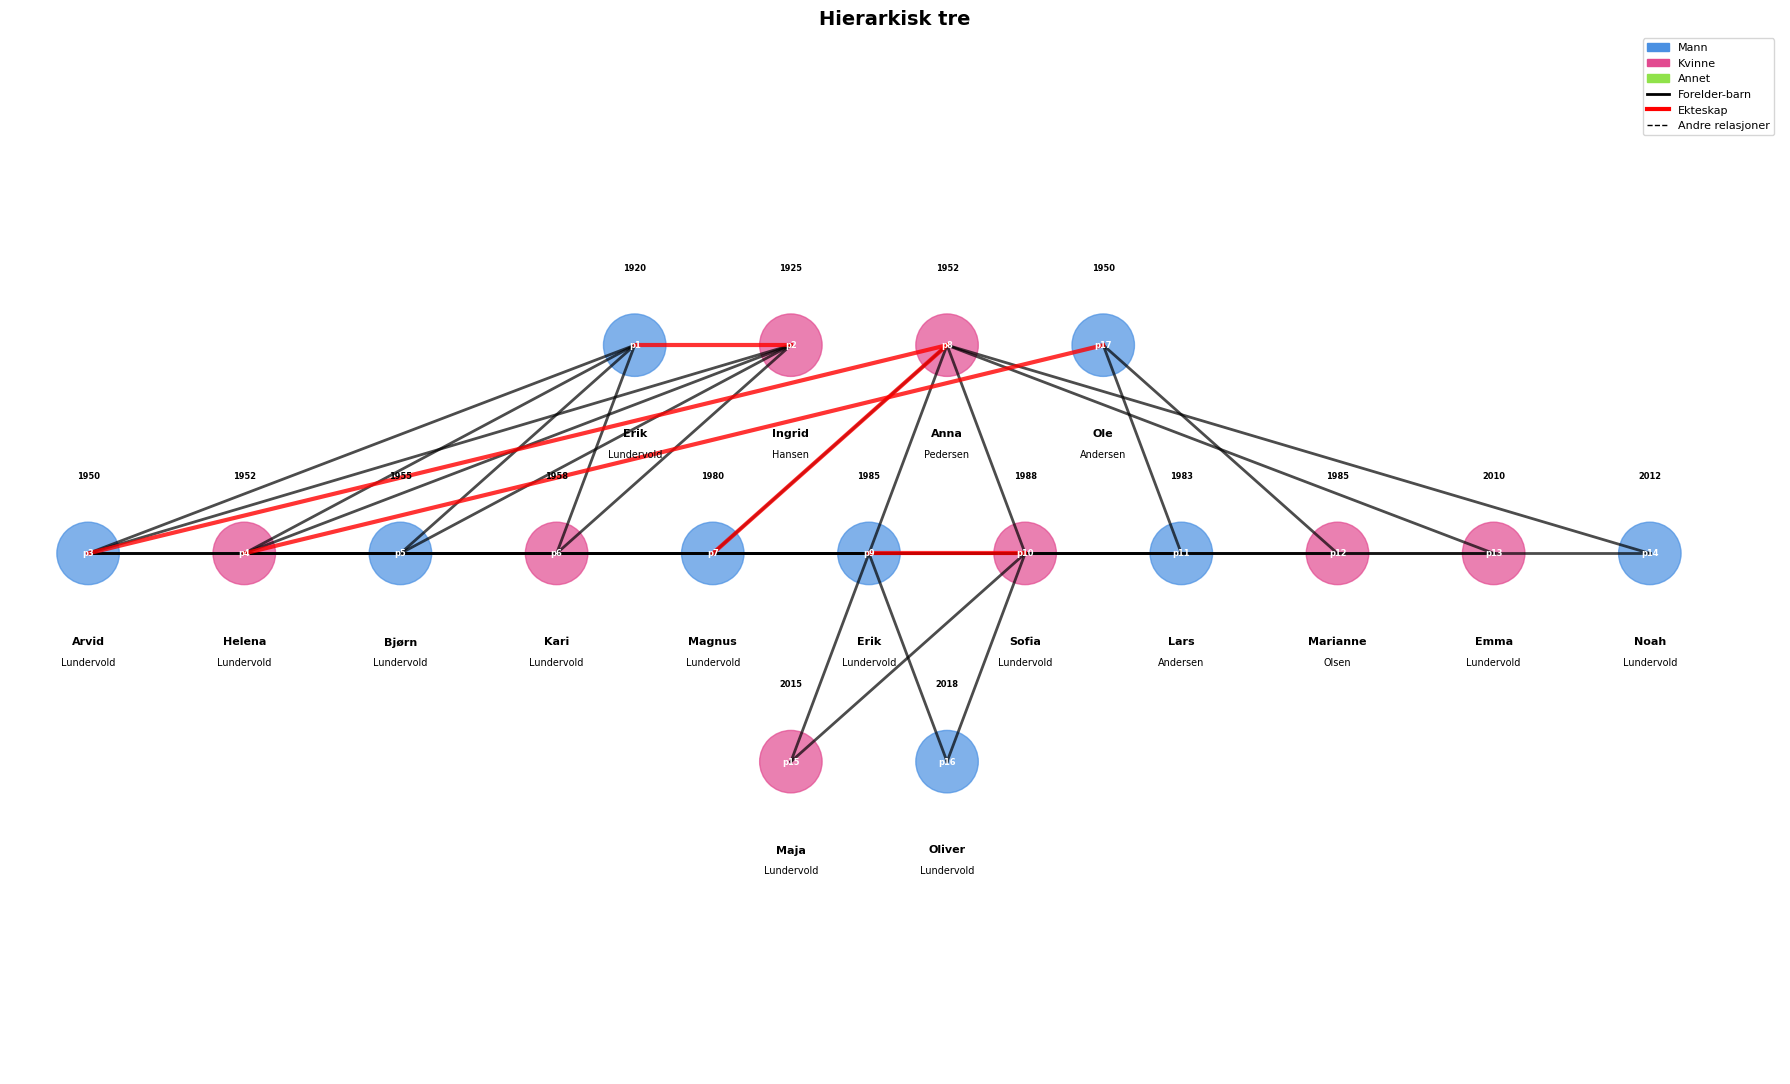

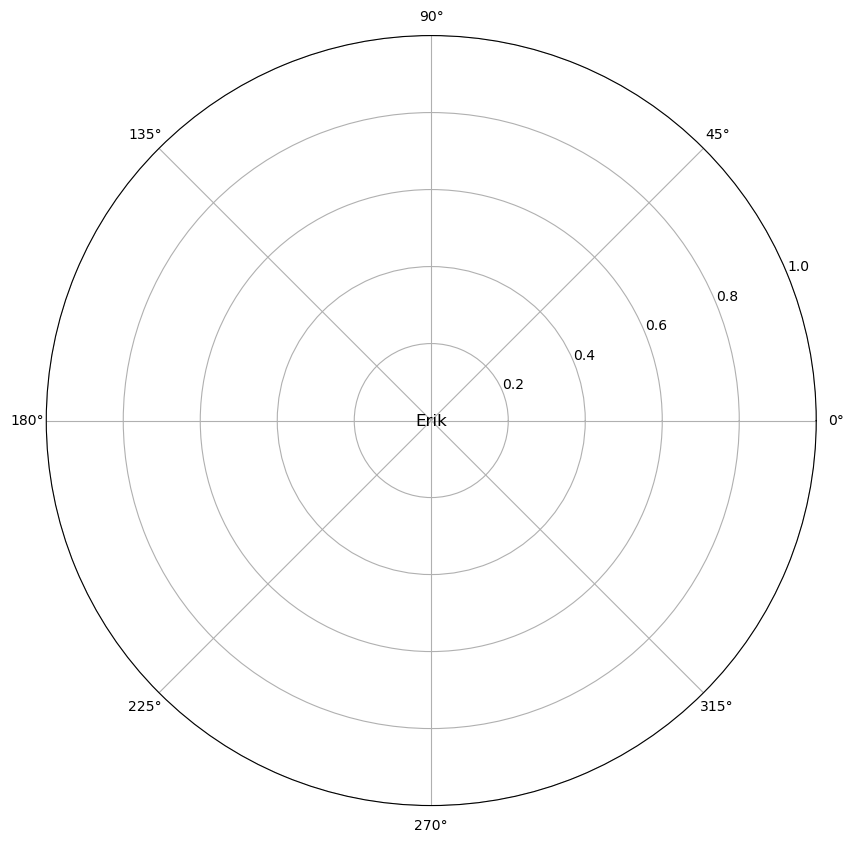

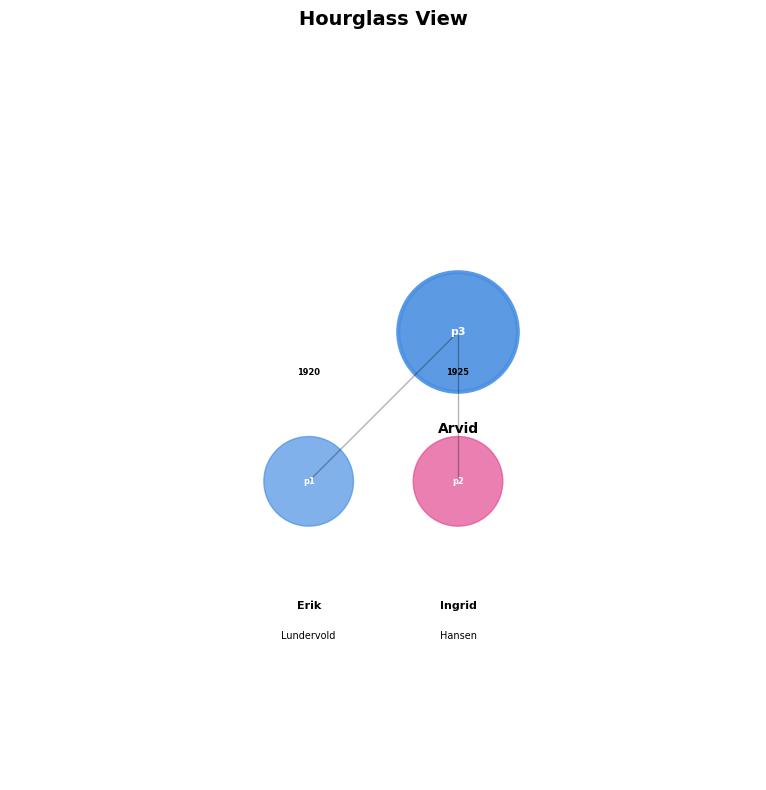

In [10]:
# Sammenlign alle visualiseringer - hver i sin egen figur
import matplotlib.pyplot as plt

# Hierarkisk tre
fig1 = plot_hierarchical_tree(slektstre, title="Hierarkisk tre")
plt.show()

# Fan chart
alle_personer = slektstre.get_all_persons()
if alle_personer:
    root_person_id = alle_personer[0].id
    fig2 = plot_fan_chart(slektstre, root_person_id, title="Fan Chart")
    plt.show()

# Hourglass view
fig3 = plot_hourglass_view(slektstre, "p3", title="Hourglass View")
plt.show()

# Statistikk
fig4 = plot_statistics(slektstre)
fig4.show()


## 8. Eksport av visualiseringer

La oss lagre visualiseringer til filer:


In [ ]:
# Lagre visualiseringer til filer
import os

# Opprett mappe for eksporterte bilder (fungerer både lokalt og i Colab)
if IN_COLAB:
    export_dir = "/content/eksporterte_bilder"
else:
    export_dir = "eksporterte_bilder"

os.makedirs(export_dir, exist_ok=True)

# Lagre hierarkisk tre
fig = plot_hierarchical_tree(slektstre, title="Hierarkisk slektstre")
fig.savefig(f"{export_dir}/hierarkisk_tre.png", dpi=300, bbox_inches='tight')
plt.close(fig)

# Lagre fan chart
alle_personer = slektstre.get_all_persons()
if alle_personer:
    root_person_id = alle_personer[0].id
    fig = plot_fan_chart(slektstre, root_person_id, title="Fan Chart")
    fig.savefig(f"{export_dir}/fan_chart.png", dpi=300, bbox_inches='tight')
    plt.close(fig)

# Lagre hourglass view
fig = plot_hourglass_view(slektstre, "p3", title="Hourglass View")
fig.savefig(f"{export_dir}/hourglass_view.png", dpi=300, bbox_inches='tight')
plt.close(fig)

# Lagre statistikk (Plotly-figur)
fig = plot_statistics(slektstre)
fig.write_image(f"{export_dir}/statistikk.png", width=800, height=600, scale=2)
# Plotly-figurer trenger ikke plt.close()

print("✅ Alle visualiseringer lagret til 'eksporterte_bilder/' mappen")
print("📁 Filene:")
for fil in os.listdir(export_dir):
    print(f"  - {fil}")


✅ Alle visualiseringer lagret til 'eksporterte_bilder/' mappen
📁 Filene:
  - fan_chart.png
  - hourglass_view.png
  - hierarkisk_tre.png
  - statistikk.png


## 9. Rydde opp

La oss slette de eksporterte bildene:


In [ ]:
# Slett eksporterte bilder
import shutil

# Slett eksporterte bilder (fungerer både lokalt og i Colab)
if IN_COLAB:
    export_dir = "/content/eksporterte_bilder"
else:
    export_dir = "eksporterte_bilder"

if os.path.exists(export_dir):
    shutil.rmtree(export_dir)
    print("🗑️ Slettet 'eksporterte_bilder/' mappen")

print("✅ Opprydding fullført!")


🗑️ Slettet 'eksporterte_bilder/' mappen
✅ Opprydding fullført!


## Oppsummering

I denne notebooken har du utforsket alle visualiseringsalternativer:

1. ✅ **Hierarkisk tre** - Tradisjonell struktur, god for oversikt
2. ✅ **Fan chart** - Sirkulær visning, visuelt tiltalende
3. ✅ **Interaktiv tre** - Plotly-basert, zoom og hover-info
4. ✅ **Hourglass view** - Fokusperson i midten, god for detaljer
5. ✅ **Statistikk** - Grafer og diagrammer, dataanalyse
6. ✅ **Tilpassede visualiseringer** - Forskjellige størrelser og parametere
7. ✅ **Sammenligning** - Side ved side visning
8. ✅ **Eksport** - Lagre til PNG-filer
9. ✅ **Opprydding** - Slette midlertidige filer

**Anbefalinger**:
- Bruk **hierarkisk tre** for generell oversikt
- Bruk **fan chart** for presentasjoner
- Bruk **interaktiv tre** for utforskning
- Bruk **hourglass view** for fokus på en person
- Bruk **statistikk** for dataanalyse

**Neste steg**: Du har nå fullført alle notebookene! Du kan begynne å bygge ditt eget slektstre.
